In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [6]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("QizhiPei/biot5-plus-base-mol-instructions-molecule")
model = T5ForConditionalGeneration.from_pretrained('QizhiPei/biot5-plus-base-mol-instructions-molecule')

In [ ]:
target_objective = "maximize the LogP"
selfies = "[O][=C][Branch1][C][/O-1][C][=C][N][=C][N][=C][Ring1][=Branch1][C][C][=N][C][Branch1][C][N][=N][C][Branch1][O][C][C][C][C][=N][C][=N][NH1][Ring1][Branch1][=N][Ring1][#C]"
prompt = "Definition: You are given a molecule SELFIES. Your job is to generate a SELFIES molecule that " + target_objective + ". Now complete the following example - Input: <bom>" + selfies + "<eom> Output"

inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(inputs["input_ids"], max_length=512, do_sample=True)
result_text = tokenizer.decode(outputs[0])
print(result_text)

<pad><extra_id_0><bom>[C][C][O][C][=Branch1][C][=O][C][=C][N][=C][N][=C][Ring1][=Branch1][C][C][=N][C][Branch1][C][N][=N][C][Branch1][O][C][C][C][C][=N][C][=N][NH1][Ring1][Branch1][=N][Ring1][#C].[NH4+1]<eom></s>


In [4]:
import selfies
smiles = "O=C(/[O-])c1cncnc1Cc1nc(N)nc(CCCc2ncn[nH]2)n1"
selfies = selfies.encoder(smiles)
print(selfies)

[O][=C][Branch1][C][/O-1][C][=C][N][=C][N][=C][Ring1][=Branch1][C][C][=N][C][Branch1][C][N][=N][C][Branch1][O][C][C][C][C][=N][C][=N][NH1][Ring1][Branch1][=N][Ring1][#C]


In [2]:
import pandas as pd

df = pd.read_csv("generation_result/temp.csv")
df = df.iloc[-1000:, :] # for faster test
df

order         time  \
199043  199044  7121.984186   
199044  199045  7121.984186   
199045  199046  7121.984186   
199046  199047  7122.076775   
199047  199048  7122.076775   
...        ...          ...   
200038  200039  7154.909024   
200039  200040  7154.909024   
200040  200041  7155.017720   
200041  200042  7155.017720   
200042  200043  7155.017720   

                                                      key  d_score_reward  \
199043  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1...        0.485744   
199044  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)n1/...        0.451467   
199045     Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nn1        0.461031   
199046  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(OC[C@...        0.423986   
199047  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(OC[C@...        0.476676   
...                                                   ...             ...   
200038  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2c(...        0.304316   
200039  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2c(...        0.256460   
200040  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...        0.517864   
200041  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...        0.000000   
200042  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...        0.531058   

            egfr     erbb2       abl       src       lck  pdgfr_beta  ...  \
199043  6.884960  5.697245  5.093579  5.652248  5.581160    5.205618  ...   
199044  6.991883  5.586157  5.700806  5.745593  5.773586    5.352564  ...   
199045  7.288126  5.642204  5.346093  5.607021  5.498766    5.228449  ...   
199046  7.124388  5.657269  5.903971  6.444666  5.630123    5.887736  ...   
199047  7.435595  5.625837  5.468713  5.376035  5.643218    6.167517  ...   
...          ...       ...       ...       ...       ...         ...  ...   
200038  7.165856  5.341879  6.057208  6.010981  5.438494    5.372968  ...   
200039  7.227801  5.236011  6.329992  6.673043  5.983369    5.735349  ...   
200040  7.540150  5.654103  5.623992  5.609469  5.357487    5.165717  ...   
200041  7.669495  5.527894  5.753760  5.690114  5.334377    5.139786  ...   
200042  7.647915  5.495371  5.675604  5.680963  5.382064    5.165717  ...   

           ephb4  solubility  permeability  metabolic_stability  toxicity  \
199043  5.710343   -3.063430      0.866871            73.644037  2.615764   
199044  5.779075   -3.077696      0.821041            65.856808  2.836399   
199045  5.594624   -3.729407      0.902159            61.612213  2.611497   
199046  5.863405   -3.245247      0.908602            53.513018  2.745464   
199047  6.162888   -3.008999      1.096623            66.242709  2.897154   
...          ...         ...           ...                  ...       ...   
200038  5.791105   -4.859965      0.946939            81.287147  2.405921   
200039  5.955781   -5.097642      0.876195            75.473797  2.555178   
200040  5.707867   -2.490852      1.160152            60.712466  2.727623   
200041  5.882025   -2.330045      1.012538            59.906364  2.836972   
200042  5.539477   -2.301073      1.076572            62.081853  2.883974   

        sa_score       qed  molecular_weight  tox_alert  has_chembl_substruct  
199043  4.123828  0.608388           378.757          1                     1  
199044  3.860245  0.418418           444.840          1                     1  
199045  3.750037  0.640572           364.754          1                     1  
199046  4.281812  0.560336           435.873          1                     1  
199047  4.371235  0.541391           452.856          1                     1  
...          ...       ...               ...        ...                   ...  
200038  3.737077  0.446663           479.300          1                     1  
200039  3.710680  0.436246           478.316          1                     1  
200040  3.973051  0.453922           458.912          1                     1  
200041  3.733050  0.419689           478.366          0      

In [3]:
from rdkit import Chem
df["mol"] = df["key"].apply(Chem.MolFromSmiles)

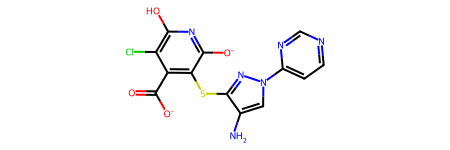

In [4]:
df["mol"][199043]

In [5]:
from rdkit.Chem import rdMMPA

def get_fragments(mol):
    return rdMMPA.FragmentMol(
        mol,
        maxCuts=2,
        maxCutBonds=20,
        resultsAsMols=True
    )

fragment_map = {}
for idx, row in df.iterrows():
    print(idx)
    frags = get_fragments(row["mol"])
    for core, sidechain in frags:
        if core is None or sidechain is None:
            continue
        key = (Chem.MolToSmiles(core),)
        val = (Chem.MolToSmiles(sidechain), row["d_score_reward"], row["key"])
        fragment_map.setdefault(key, []).append(val)
        print(key, val)

results = []
for core, entries in fragment_map.items():
    if len(entries) < 2:
        continue
    for i in range(len(entries)):
        for j in range(i + 1, len(entries)):
            sc1, p1, s1 = entries[i]
            sc2, p2, s2 = entries[j]
            delta = p2 - p1
            results.append({
                "core": core,
                "sc1": sc1,
                "sc2": sc2,
                "delta_property": delta,
                "smiles1": s1,
                "smiles2": s2
            })

mmpa_df = pd.DataFrame(results)

199043
('O=C([O-])c1c(Cl)c(O)nc([O-])c1Sc1nn([*:2])cc1[*:1]',) ('N[*:1].c1cc([*:2])ncn1', 0.4857442276226447, 'Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1[O-]')
('c1cc(-n2cc([*:1])c([*:2])n2)ncn1',) ('N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1S[*:2]', 0.4857442276226447, 'Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1[O-]')
('c1cc(-n2cc([*:1])c(S[*:2])n2)ncn1',) ('N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1[*:2]', 0.4857442276226447, 'Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1[O-]')
('[O-]c1nc(O)c(Cl)c([*:1])c1Sc1nn(-c2ccncn2)cc1[*:2]',) ('N[*:2].O=C([O-])[*:1]', 0.4857442276226447, 'Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1[O-]')
('O=C([O-])c1c(Sc2nn(-c3ccncn3)cc2[*:2])c([O-])nc(O)c1[*:1]',) ('Cl[*:1].N[*:2]', 0.4857442276226447, 'Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1[O-]')
('O=C([O-])c1c(Cl)c([*:2])nc([O-])c1Sc1nn(-c2ccncn2)cc1[*:1]',) ('N[*:1].O[*:2]', 0.4857442276226447, 'Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1[O-]')
('O=C([O-])c1c(Cl)c(O)nc([*:2])c1Sc1nn(-c2ccncn2

In [6]:
mmpa_df

core  \
0                      (c1cc(-n2cc([*:1])c([*:2])n2)ncn1,)   
1                      (c1cc(-n2cc([*:1])c([*:2])n2)ncn1,)   
2                      (c1cc(-n2cc([*:1])c([*:2])n2)ncn1,)   
3                      (c1cc(-n2cc([*:1])c([*:2])n2)ncn1,)   
4                      (c1cc(-n2cc([*:1])c([*:2])n2)ncn1,)   
...                                                    ...   
2880208  (Nc1cn(-c2ccncn2)nc1Sc1c([*:2])nc(Cc2cccs2)c(C...   
2880209  (Nc1cn(-c2ccncn2)nc1Sc1c([*:2])nc(Cc2cccs2)c(C...   
2880210  (Nc1cn(-c2ccncn2)nc1Sc1c([*:2])nc(Cc2cccs2)c([...   
2880211  (Nc1cn(-c2ccncn2)nc1Sc1c([*:2])nc(Cc2cccs2)c([...   
2880212  (Nc1cn(-c2ccncn2)nc1Sc1c([*:2])nc(Cc2cccs2)c([...   

                                                 sc1  \
0        N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1S[*:2]   
1        N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1S[*:2]   
2        N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1S[*:2]   
3        N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1S[*:2]   
4        N[*:1].O=C([O-])c1c(Cl)c(O)nc([O-])c1S[*:2]   
...                                              ...   
2880208                     O=C([O-])[*:1].[O-][*:2]   
2880209                       Cl[*:2].O=C([O-])[*:1]   
2880210                            Cl[*:1].[O-][*:2]   
2880211                            Cl[*:1].[O-][*:2]   
2880212                              Cl[*:1].Cl[*:2]   

                                                       sc2  delta_property  \
0         N[*:1].O=C([O-])c1c(Cl)c(O)n(N=Cc2ccco2)c1S[*:2]       -0.034278   
1                    N[*:1].O=C([O-])c1c(S[*:2])nnc(O)c1Cl       -0.024713   
2        N[*:1].O=C([O-])c1c(S[*:2])[nH]c(OC[C@@H]2CCCO...       -0.061758   
3        N[*:1].O=C([O-])c1c(S[*:2])oc(OC[C@@H]2COCCO2)...       -0.009069   
4        N[*:1].O=C([O-])c1c(S[*:2])oc(OC[C@@H]2CCCO2)c1Cl       -0.001921   
...                                                    ...             ...   
2880208                              N[*:2].O=C([O-])[*:1]        0.013194   
2880209                              N[*:2].O=C([O-])[*:1]        0.531058   
2880210                                    Cl[*:1].Cl[*:2]       -0.517864   
2880211                                     Cl[*:1].N[*:2]        0.013194   
2880212                                     Cl[*:1].N[*:2]        0.531058   

                                                   smiles1  \
0        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1...   
1        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1...   
2        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1...   
3        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1...   
4        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nc1...   
...                                                    ...   
2880208  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...   
2880209  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...   
2880210  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...   
2880211  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...   
2880212  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...   

                                                   smiles2  
0        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)n1/...  
1           Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(O)nn1  
2        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(OC[C@...  
3        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(OC[C@...  
4        Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(OC[C@...  
...                                                    ...  
2880208  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...  
2880209  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...  
2880210  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...  
2880211  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...  
2880212  Nc1cn(-c2ccncn2)nc1Sc1c(C(=O)[O-])c(Cl)c(Cc2cc...  

[2880213 rows x 6 columns]

In [7]:
mmpa_df["smirks"] = mmpa_df.apply(lambda row: f"{row['sc1']}>>{row['sc2']}", axis=1)

smirks = (
    mmpa_df.groupby("smirks")["delta_property"]
    .agg(["mean", "std", "count"])
    .reset_index()
    # .sort_values("mean", ascending=False)
)

In [ ]:
smirks

smirks      mean  \
0                  Br[*:1].C[*:2]>>F[*:1].Fc1ccc([*:2])cc1  0.056139   
1                 Br[*:1].Cl[*:2]>>C1CCC(O[*:2])C1.Cl[*:1]  0.000000   
2              Br[*:1].Cl[*:2]>>C1CCN([*:1])C1.FC(F)O[*:2]  0.380603   
3                          Br[*:1].Cl[*:2]>>C[*:1].Cl[*:2]  0.030878   
4                          Br[*:1].Cl[*:2]>>Cl[*:1].F[*:2] -0.125962   
...                                                    ...       ...   
2830225  c1coc([*:2])c1.c1ncn(CS[*:1])n1>>c1ccc([*:2])c... -0.005111   
2830226  c1coc([*:2])c1.c1ncn(CS[*:1])n1>>c1ccc([*:2])n... -0.021729   
2830227  c1coc([*:2])c1.c1ncn(CS[*:1])n1>>c1cncc([*:1])... -0.011252   
2830228  c1coc([*:2])c1.c1ncn(C[*:1])n1>>ClC[*:1].Fc1cc...  0.014065   
2830229  c1coc([*:2])c1.c1ncn(C[*:1])n1>>c1ccc([*:2])cc... -0.005111   

              std  count  
0             NaN      1  
1             NaN      1  
2             NaN      1  
3        0.003791      2  
4        0.000000      2  
...           ...    ...  
2830225       NaN      1  
2830226       NaN      1  
2830227       NaN      1  
2830228       NaN      1  
2830229       NaN      1  

[2830230 rows x 4 columns]

In [10]:
from rdkit.Chem import AllChem

def apply_smirks(mol: Chem.Mol, smirks: str):
    try:
        rxn = AllChem.ReactionFromSmarts(smirks, useSmiles=True)
        products = rxn.RunReactants((mol,))
        return products
    except Exception as e:
        return []

In [11]:
culled_smirks = smirks[smirks["mean"] > 0]
culled_smirks = culled_smirks[culled_smirks["count"] > 1]

In [ ]:
mol = Chem.molFromSmiles("O[C@H](c1cncnc1C(CC(F)F)F)C(=O)[O-]")

In [12]:
for s in culled_smirks["smirks"]:
    print(s)

Br[*:1].Cl[*:2]>>C[*:1].Cl[*:2]
Br[*:1].N[*:2]>>C[*:1].N[*:2]
Br[*:1].Nc1cn(-c2ccncn2)nc1S[*:2]>>C[*:1].Nc1cn(-c2ccncn2)nc1S[*:2]
Br[*:1].Nc1cn(-c2ccncn2)nc1Sc1[nH]c([*:2])c(Cl)c1C(=O)[O-]>>F[*:1].Nc1cn(-c2ccncn2)nc1Sc1oc(CO[*:2])c(Cl)c1C(=O)[O-]
Br[*:1].Nc1cn(-c2ccncn2)nc1[*:2]>>C[*:1].Nc1cn(-c2ccncn2)nc1[*:2]
Br[*:1].O=C([O-])[*:2]>>C[*:1].O=C([O-])[*:2]
Br[*:1].c1cc([*:2])ncn1>>C[*:1].c1cc([*:2])ncn1
Brc1ccc(C[*:1])cc1.Cl[*:2]>>C1COC([*:1])OC1.Cl[*:2]
Brc1ccc(C[*:1])cc1.Cl[*:2]>>C1OCC([*:1])O1.Cl[*:2]
Brc1ccc(C[*:1])cc1.Cl[*:2]>>Cl[*:2].OC1CCC([*:1])OC1
Brc1ccc(C[*:1])cc1.Cl[*:2]>>Cl[*:2].c1ccc(COC[*:1])cc1
Brc1ccc(C[*:1])cc1.N[*:2]>>C1COC([*:1])OC1.N[*:2]
Brc1ccc(C[*:1])cc1.N[*:2]>>C1OCC([*:1])O1.N[*:2]
Brc1ccc(C[*:1])cc1.N[*:2]>>N[*:2].OC1CCC([*:1])OC1
Brc1ccc(C[*:1])cc1.N[*:2]>>N[*:2].c1ccc(COC[*:1])cc1
Brc1ccc(C[*:1])cc1.Nc1cn(-c2ccncn2)nc1S[*:2]>>C1COC([*:1])OC1.Nc1cn(-c2ccncn2)nc1S[*:2]
Brc1ccc(C[*:1])cc1.Nc1cn(-c2ccncn2)nc1S[*:2]>>C1OCC([*:1])O1.Nc1cn(-c2ccncn2)nc1S[*:2]
Brc1